# MATH 210 Introduction to Mathematical Computing

**March 18, 2024**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi

## Systems of Differential Equations

### 2D Linear System

Compute numerical solution of $\mathbf{y}' = A \mathbf{y} + \mathbf{b}$ where

$$
A = \begin{bmatrix} 4 & 2 \\ 2 & 1 \end{bmatrix}
\hspace{1in}
\mathbf{b} = \begin{bmatrix} 1 \\ 1 \end{bmatrix}
\hspace{1in}
\mathbf{y}(t) = \begin{bmatrix} y_0(t) \\ y_1(t) \end{bmatrix}
$$

In [2]:
A = np.array([[4,2],[2,1]])
b = np.array([1,1])
f = lambda y,t: np.array([A[0,0]*y[0] + A[0,1]*y[1] + b[0],A[1,0]*y[0] + A[1,1]*y[1] + b[1]])
# f = lambda y,t: A@y + b
y0 = np.array([0,0])
t0 = 0; tf = 0.2; N = 50;
t = np.linspace(t0,tf,N+1)
y = spi.odeint(f,y0,t)

In [3]:
y.shape

(51, 2)

Plot the solution $y_0(t)$ versus $y_1(t)$.

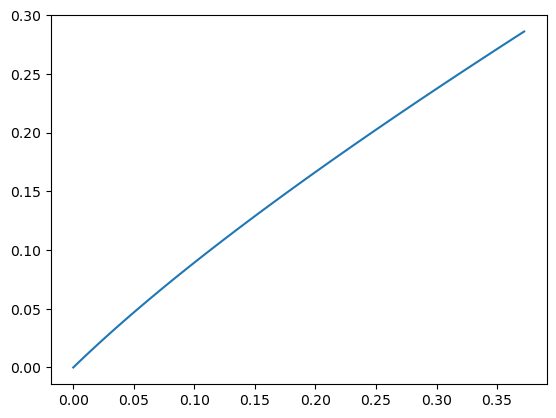

In [5]:
plt.plot(y[:,0],y[:,1])
plt.show()

Plot each $y_0(t)$ and $y_1(t)$ versus time $t$.

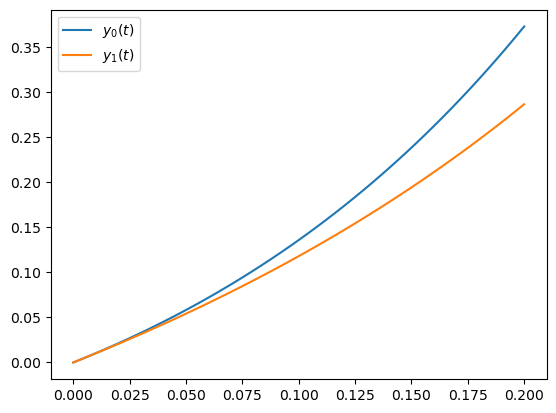

In [7]:
plt.plot(t,y[:,0],label='$y_0(t)$')
plt.plot(t,y[:,1],label='$y_1(t)$')
plt.legend()
plt.show()

Solutions are increasing over time. The steady state is unstable.

### Spiral Sink

Compute numerical solutions of $\mathbf{y}' = A\mathbf{y}$ for different initial values for

$$
A = \begin{bmatrix} -1 & -1 \\ 1 & -1 \end{bmatrix}
$$

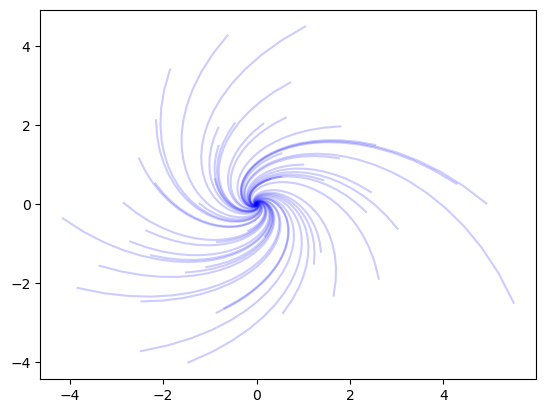

In [8]:
A = np.array([[-1,-1],[1,-1]])
f = lambda y,t: A@y
t0 = 0; tf = 5; N = 50;
t = np.linspace(t0,tf,N+1)
for _ in range(50):
    y0 = 2*np.random.randn(2)
    y = spi.odeint(f,y0,t)
    plt.plot(y[:,0],y[:,1],'b',alpha=0.2)
plt.show()

All solutions spiral towards the origin. The origin is a stable steady state. Eigenvalues are complex with negative real part.

### Predator Prey System

Compute numerical solutions of the predator-prey system:

\begin{align*}
x' &= \alpha x - \beta xy \\
y' &= \delta xy - \gamma y \\
\end{align*}

where $\alpha,\beta,\delta, \gamma \in \mathbb{R}$ and $x(t)$ is the population of the prey at time t and $y(t)$ is the population of the predator at time t.

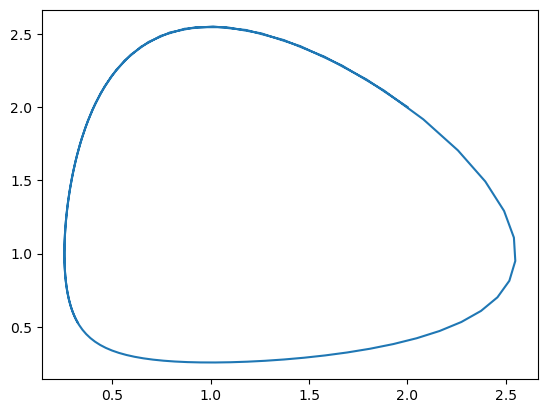

In [9]:
# Let u = [u[0],u[1]] where x = u[0] and y = u[1]
alpha = 1; beta = 1; gamma = 1; delta = 1;
f = lambda u,t: np.array([alpha*u[0] - beta*u[0]*u[1],delta*u[0]*u[1] - gamma*u[1]])
u0 = np.array([2,2])
t0 = 0; tf = 10; N = 100;
t = np.linspace(t0,tf,N+1)
u = spi.odeint(f,u0,t)
plt.plot(u[:,0],u[:,1])
plt.show()